In [2]:
import pandas
df = pandas.read_excel("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\MLProject_3.xlsx")
df.drop("Unnamed: 0",axis = 1,inplace = True)
df.head()

,Balkon_Sayisi,Binanin_Kat_Sayisi,Esya_Durumu,Banyo_Sayisi,Binanin_Yasi,Isitma_Tipi,Net_Metrekare,Oda_Sayisi,Site_Durumu,Fiyat
0,0,3,0,1,4,5,95,4,1,1950000
1,3,3,0,2,0,5,140,4,1,3100000
2,3,2,0,2,1,5,160,4,0,4500000
3,1,3,0,1,4,5,150,4,1,1650000
4,1,3,0,1,0,5,45,2,0,1150000


In [3]:
print(df['Balkon_Sayisi'].isnull().values.any())
print(df['Binanin_Kat_Sayisi'].isnull().values.any())
print(df['Esya_Durumu'].isnull().values.any())
print(df['Banyo_Sayisi'].isnull().values.any())
print(df['Binanin_Yasi'].isnull().values.any())
print(df['Isitma_Tipi'].isnull().values.any())
print(df['Net_Metrekare'].isnull().values.any())
print(df['Oda_Sayisi'].isnull().values.any())
print(df['Site_Durumu'].isnull().values.any())
print(df['Fiyat'].isnull().values.any())

False
False
False
False
False
False
False
False
False
False


In [4]:
import pandas
import numpy
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [6]:
dataset = pandas.read_excel("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\MLProject_3.xlsx")
dataset.drop("Unnamed: 0",axis = 1,inplace = True)
dataset

,Balkon_Sayisi,Binanin_Kat_Sayisi,Esya_Durumu,Banyo_Sayisi,Binanin_Yasi,Isitma_Tipi,Net_Metrekare,Oda_Sayisi,Site_Durumu,Fiyat
0,0,3,0,1,4,5,95,4,1,1950000
1,3,3,0,2,0,5,140,4,1,3100000
2,3,2,0,2,1,5,160,4,0,4500000
3,1,3,0,1,4,5,150,4,1,1650000
4,1,3,0,1,0,5,45,2,0,1150000
...,...,...,...,...,...,...,...,...,...,...
865,1,3,0,1,0,5,80,3,1,1600000
866,1,3,0,1,0,5,80,3,1,1600000
867,1,4,0,1,4,5,80,3,1,1500000
868,1,3,0,1,4,5,80,3,1,1450000


In [7]:
X  = dataset.iloc[:, 0:9].values
y  = dataset.iloc[:,9].values
y = y.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)
regressor.fit(X_train, y_train)
y_predDT = regressor.predict(X_test)
DT_RSCORE = r2_score(y_test, y_predDT)
print(DT_RSCORE)

0.3975833367665511


In [9]:
#Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred_linear = linear_regressor.predict(X_test)

linear_r2 = r2_score(y_test, y_pred_linear)
print(linear_r2)

-113.01643395474679


In [10]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators = 100,random_state=0)

rf_regressor.fit(X_train, y_train.ravel())

y_pred_rf = rf_regressor.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
print(rf_r2)

-9561.821386987724


In [11]:
#Lasso Regression
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.1)

lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred_lasso)
print(lasso_r2)

-113.01642948812943


In [12]:
#Support Vector Regressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test)

svr_regressor = SVR(kernel='linear')  # lineer kernel kullanılıyor, diğer kernel seçenekleri de mevcut

svr_regressor.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_svr = svr_regressor.predict(X_test_scaled)

svr_r2 = r2_score(y_test, y_pred_svr)
print(svr_r2)

-2.436340773411529


In [13]:
#K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)  

knn_regressor.fit(X_train, y_train)

y_pred_knn = knn_regressor.predict(X_test)

knn_r2 = r2_score(y_test, y_pred_knn)
print(knn_r2)

0.5445817351307395


In [14]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

gb_regressor.fit(X_train, y_train.ravel())

y_pred_gb = gb_regressor.predict(X_test)

gb_r2 = r2_score(y_test, y_pred_gb)
print(gb_r2)

-1969.258483388288


In [15]:
# ElasticNet Regressor
from sklearn.linear_model import ElasticNet

elasticnet_regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha, düzenleme parametresidir, l1_ratio L1 düzenleme oranını belirler

elasticnet_regressor.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_regressor.predict(X_test)

elasticnet_r2 = r2_score(y_test, y_pred_elasticnet)
print(elasticnet_r2)

-90.86097538397163


In [16]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_regressor = Ridge(alpha=0.1)  # alpha, düzenleme parametresidir

ridge_regressor.fit(X_train, y_train)

y_pred_ridge = ridge_regressor.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred_ridge)
print(ridge_r2)


-112.92821493437533


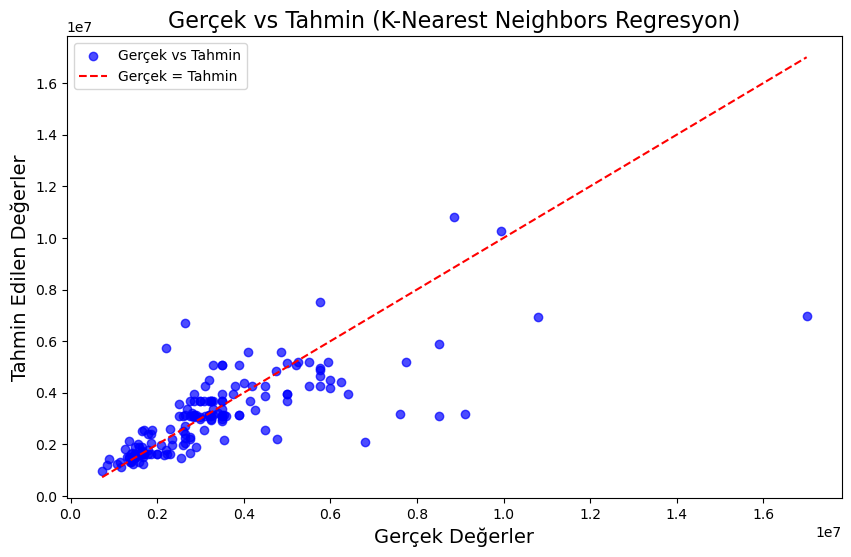

In [17]:
import matplotlib.pyplot as plt

# Scatter plot oluştur
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.7, color='b', label='Gerçek vs Tahmin')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Gerçek = Tahmin')

# Grafik üzerine bilgi ekle
plt.title('Gerçek vs Tahmin (K-Nearest Neighbors Regresyon)', fontsize=16)
plt.xlabel('Gerçek Değerler', fontsize=14)
plt.ylabel('Tahmin Edilen Değerler', fontsize=14)
plt.legend()

# Grafik göster
plt.show()

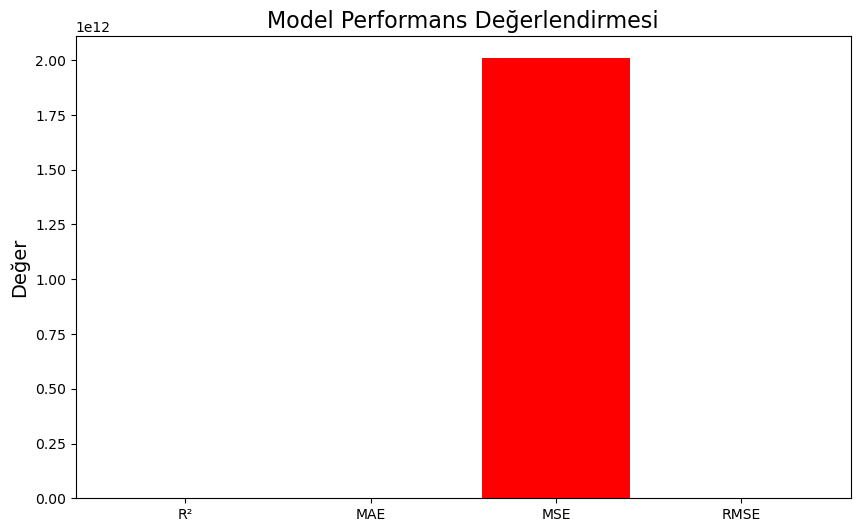

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# RMSE fonksiyonunu tanımla
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# RMSE değerini hesapla
rmse_value = rmse(y_test, y_pred_knn)

# R-kare, MAE, MSE ve RMSE değerlerini hesapla
r2 = r2_score(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)

# Bar grafik oluştur
metrics = {'R²': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse_value}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performans Değerlendirmesi', fontsize=16)
plt.ylabel('Değer', fontsize=14)
plt.show()

In [19]:
import joblib
joblib.dump(knn_regressor, "knn_model.pkl")

['knn_model.pkl']

In [20]:
joblib.dump(regressor, "decision_tree_model.pkl")

['decision_tree_model.pkl']

In [21]:
joblib.dump(linear_regressor, "linear_model.pkl")

['linear_model.pkl']

In [22]:
joblib.dump(lasso_regressor, "lasso_model.pkl")

['lasso_model.pkl']

In [23]:
joblib.dump(rf_regressor, "rf_model.pkl")

['rf_model.pkl']

In [24]:
joblib.dump(gb_regressor, "gb_model.pkl")

['gb_model.pkl']

In [25]:
joblib.dump(elasticnet_regressor, "elasticnet_model.pkl")

['elasticnet_model.pkl']

In [26]:
joblib.dump(ridge_regressor, "ridge_model.pkl")

['ridge_model.pkl']

In [1]:
import pandas
import numpy
import joblib

In [2]:
knn_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\knn_model.pkl")
decision_tree_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\decision_tree_model.pkl")
elasticnet_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\elasticnet_model.pkl")
gb_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\gb_model.pkl")
lasso_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\lasso_model.pkl")
linear_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\linear_model.pkl")
rf_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\rf_model.pkl") # 0.7688218633726958 (en iyi sonuç)
ridge_model = joblib.load("C:\\Users\\sakar\\ML_Projesi\\Algoritmalar\\ridge_model.pkl")

In [3]:
binanin_yaslari = pandas.read_excel("C:\\Users\\sakar\\ML_Projesi\\VeriToplama\\bina_yasi.xlsx")
isitma_tipleri = pandas.read_excel("C:\\Users\\sakar\\ML_Projesi\\VeriToplama\\isitma_tipi.xlsx")

In [4]:
binanin_yaslari

,Binanin_Yasi
0,0-5
1,11-15
2,16-20
3,21 Ve Üzeri
4,5-10


In [5]:
isitma_tipleri

,Isitma_Tipi
0,Doğalgaz Sobalı
1,Elektrikli Radyatör
2,Isıtma Yok
3,Kat Kaloriferi
4,Klimalı
5,Kombi Doğalgaz
6,Merkezi (Pay Ölçer)
7,Merkezi Doğalgaz
8,Sobalı
9,Yerden Isıtma


In [6]:
def binanin_yasi_index(binanin_yasi):
    index = int(binanin_yaslari[binanin_yaslari["Binanin_Yasi"]==binanin_yasi].index.values)
    return index
def isitma_tipi_index(isitma_tipi):
    index = int(isitma_tipleri[isitma_tipleri["Isitma_Tipi"]==isitma_tipi].index.values)
    return index

In [7]:
def create_prediction_value(balkon_sayisi,binanin_kat_sayisi,esya_durumu,banyo_sayisi,binanin_yasi,isitma_tipi,net_metrekare,oda_sayisi,site_durumu):
    res = pandas.DataFrame(data = 
            {'Balkon_Sayisi':[balkon_sayisi],'Binanin_Kat_Sayisi':[binanin_kat_sayisi],'Esya_Durumu':[esya_durumu],
             'Banyo_Sayisi':[banyo_sayisi],'Binanin_Yasi':[binanin_yasi],
              'Isitma_Tipi':[isitma_tipi],'Net_Metrekare':[net_metrekare],'Oda_Sayisi':[oda_sayisi],
             'Site_Durumu':[site_durumu]})
    return res

In [8]:
def esya_durumu(esya_durumu):
    if esya_durumu == "Eşyalı":
        return 1
    else:
        return 0
def site_durumu(site_durumu):
    if site_durumu == "Hayır":
        return 1
    else:
        return 0

In [9]:
def predict_models(res):
    print("K-Nearest Neighbors Result : "+ str(int(knn_model.predict(res))).strip('[]') +" TL" )
    print("Decision Tree Result : "+ str(int(decision_tree_model.predict(res))).strip('[]') +" TL" )
    print("ElasticNet Result : "+ str(int(elasticnet_model.predict(res))).strip('[]') +" TL" )
    print("Gradient Boosting Result : "+ str(int(gb_model.predict(res))).strip('[]') +" TL" )
    print("Lasso Result : "+ str(int(lasso_model.predict(res))).strip('[]') +" TL" )
    print("Linear Result : "+ str(int(linear_model.predict(res))).strip('[]') +" TL" )
    print("Random Forest Result : "+ str(int(rf_model.predict(res))).strip('[]') +" TL" )
    print("Ridge Result : "+ str(int(ridge_model.predict(res))).strip('[]') +" TL" )

In [11]:
predict_value = create_prediction_value(3, 3, esya_durumu("Boş"), 2, binanin_yasi_index("0-5"), isitma_tipi_index("Kombi Doğalgaz"), 140.0, 4, site_durumu("Hayır"))
predict_models(predict_value)

K-Nearest Neighbors Result : 3109800 TL
Decision Tree Result : 2065248 TL
ElasticNet Result : 26065087 TL
Gradient Boosting Result : 2782699 TL
Lasso Result : 27499264 TL
Linear Result : 27499264 TL
Random Forest Result : 2976400 TL
Ridge Result : 27494223 TL


C:\Users\sakar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
C:\Users\sakar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\sakar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
C:\Users\sakar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
C:\Users\sakar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Users\sakar\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  w